In [80]:
from bs4 import BeautifulSoup
from bs4 import Comment
import requests
import time
import pandas as pd
from collections import defaultdict
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# from skimage import io
# import urllib3
# from urllib.request import urlopen
# import PIL
import itertools
from pyvis import network as net
import random
import json
import pickle

In [184]:
# horry = BeautifulSoup(requests.get("https://www.basketball-reference.com/players/h/horryro01.html").text)
graph.write_html("dick.html")

In [16]:
# playerDf = pd.read_csv("data/playerDf.csv")
playerDf[playerDf["Player"] == "Josh Smith"]

,Team,Team Key,Season,Player,Player Key
144,Atlanta Hawks,ATL,2012-13,Josh Smith,/players/s/smithjo03.html
162,Atlanta Hawks,ATL,2011-12,Josh Smith,/players/s/smithjo03.html
178,Atlanta Hawks,ATL,2010-11,Josh Smith,/players/s/smithjo03.html
191,Atlanta Hawks,ATL,2009-10,Josh Smith,/players/s/smithjo03.html
202,Atlanta Hawks,ATL,2008-09,Josh Smith,/players/s/smithjo03.html
212,Atlanta Hawks,ATL,2007-08,Josh Smith,/players/s/smithjo03.html
227,Atlanta Hawks,ATL,2006-07,Josh Smith,/players/s/smithjo03.html
239,Atlanta Hawks,ATL,2005-06,Josh Smith,/players/s/smithjo03.html
253,Atlanta Hawks,ATL,2004-05,Josh Smith,/players/s/smithjo03.html
4791,Detroit Pistons,DET,2019-20,Josh Smith,/players/s/smithjo03.html


In [2]:
teamCodes = ["ATL", "BOS", "NJN", "CHA", "CHI", "CLE", "DAL", "DEN", "DET", "GSW",
             "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOH", "NYK",
             "OKC", "ORL", "PHI", "PHO", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"]

In [3]:
def getPlayers(t1, t2, players):
#     players, playerURL = set(), set()
#     players = set([i for i in t1.find_all("a")[::2]] + [j for j in t2.find_all("a")[::2]])
#     out = defaultdict(str)
    out = {}
    players1 = [[i.find("a").text, i.find("a")["href"]] for i in t1.find_all("td", attrs={"data-stat": "player"})]
    players2 = [[j.find("a").text, j.find("a")["href"]] for j in t2.find_all("td", attrs={"data-stat": "player"})]
    for k in (players1 + players2 + players):
        out[k[0]] = k[1]
    
#     for i in t1.find_all("td", attrs={"data-stat": "player"}):
#         [i.find("a").text for i in t1.find_all("td", attrs={"data-stat": "player"})]
#         players.add([i.find("a").text, i.find("a", href=True)["href"]])
#         players.add(i.find("a").text)
#         playerURL.add(i.find("a", href=True)["href"])
#     return sorted(list(players)), sorted(list(playerURL))
#     return list(players)
    return out 

In [143]:
# meow = BeautifulSoup(requests.get("https://www.basketball-reference.com/teams/GSW/2011.html").text)
# meow

In [7]:
playerData = {"Team": [], "Team Key": [], "Season": [], "Player": [], "Player Key": []}
baseURL = "https://www.basketball-reference.com"

for i in teamCodes:
    startTime = time.time()
    teamURL = baseURL + "/teams/" + i + "/"
    teamPage = BeautifulSoup(requests.get(teamURL).text)
    seasons = teamPage.find_all("tbody")[0].find_all("tr")
    numSeasons = len(seasons)
    if numSeasons > 41:        # at most 80-81 to present
        teamPage = seasons[:41]
    else:
        teamPage = seasons
    
    for j in teamPage:
        pageRequest = requests.get(baseURL + j.find_all("a", href=True)[0]["href"])
        seasonPage = BeautifulSoup(pageRequest.text)
        seasonMetadata = seasonPage.find_all("title")[0].text.split(" ")[:-5]
        teamName = ""
        for k in seasonMetadata[1:]:
            teamName += k + " "
        teamName = teamName.strip()
        seasonYear = seasonMetadata[0]
        
        # Parse hidden tables in comments for salary table if present          
        salaryDivText = '<div class="table_container" id="div_salaries2">'
        players = []
        pageComments = seasonPage.find_all(string=lambda text: isinstance(text, Comment))
        for index, value in enumerate(pageComments):
            try:
                if value[:51].strip() == salaryDivText:
                    rosterSalary = BeautifulSoup(pageComments[index]).find("table", attrs={"id":"salaries2"}).find_all("a")
                    players = [[i.text, i["href"]] for i in rosterSalary]
                    break
            except:
                continue
    
        seasonTables = seasonPage.find_all("tbody")
        table_1, table_2 = seasonTables[0], seasonTables[1]
        allPlayers = getPlayers(table_1, table_2, players)
        
        playerData["Team"] += [teamName] * len(allPlayers)
        playerData["Team Key"] += [i] * len(allPlayers)
        playerData["Season"] += [seasonYear] * len(allPlayers)
        playerData["Player"] += list(allPlayers.keys())
        playerData["Player Key"] += list(allPlayers.values())
        time.sleep(4)
    print(i, time.time() - startTime, "seconds")
    time.sleep(2)

ATL 196.6223030090332 seconds
BOS 199.86683106422424 seconds
NJN 193.28741788864136 seconds
CHA 145.6291811466217 seconds
CHI 192.61266899108887 seconds
CLE 193.0920341014862 seconds
DAL 192.83993577957153 seconds
DEN 193.16259717941284 seconds
DET 192.4083640575409 seconds
GSW 194.95292901992798 seconds
HOU 193.669349193573 seconds
IND 193.0674238204956 seconds
LAC 267.5154387950897 seconds
LAL 193.5535740852356 seconds
MEM 122.40524387359619 seconds
MIA 156.6255669593811 seconds
MIL 193.54481720924377 seconds
MIN 150.64372611045837 seconds
NOH 90.02031111717224 seconds
NYK 193.70916295051575 seconds
OKC 197.10673809051514 seconds
ORL 154.11695003509521 seconds
PHI 198.79441905021667 seconds
PHO 196.89999675750732 seconds
POR 199.2227737903595 seconds
SAC 203.043536901474 seconds
SAS 197.15752911567688 seconds
TOR 122.96136403083801 seconds
UTA 193.1484498977661 seconds
WAS 193.15933966636658 seconds


In [8]:
playerDf = pd.DataFrame(playerData)
baseURL = "https://www.basketball-reference.com"
playerImages = {"Player Key": [], "Image": []}

startTime = time.time()
for i in list(playerDf["Player Key"].unique()):
    playerPage = BeautifulSoup(requests.get(baseURL + i).text)
    try:
        careerGames = float(playerPage.find_all("tfoot")[0].find_all("td", attrs={"data-stat": "g"})[0].text)
        avgMins = float(playerPage.find_all("tfoot")[0].find_all("td", attrs={"data-stat": "mp_per_g"})[0].text)
    except:
        careerGames, avgMins = 0,0    # Players with 0 minutes/games played or drafted but never played
        print(i)
    playerImages["Player Key"].append(i)
    minutesPlayed = careerGames * avgMins
    if minutesPlayed < 2500:      # exclude players with < 2500 minutes played
        playerImages["Image"].append(None)
    else:
        try:
            playerImages["Image"].append(playerPage.find_all("img", attrs={"itemscope": "image"}, src=True)[0]["src"])
        except:   #IndexError for players with no images
            playerImages["Image"].append("https://i0.wp.com/sgbt.lu/uploads/tx_bisgbio/default-profile.png")
    time.sleep(2)
    
print(time.time() - startTime, "seconds")

/players/p/pettete01.html
/players/r/randole01.html
/players/w/waldeco01.html
/players/o/ouattya01.html
/players/m/mockeeg01.html
/players/b/beechbe01.html
/players/i/ibehpr01.html
/players/b/boatrry01.html
/players/j/johnsja04.html
/players/f/faircj02.html
/players/w/walkuth01.html
/players/p/pointsi01.html
/players/t/thornma02.html
/players/l/larrite01.html
/players/y/yanyudi01.html
/players/a/ashlebr01.html
/players/f/famouja01.html
/players/g/griffer01.html
/players/j/jovanni01.html
/players/j/jonesca02.html
/players/c/cookel01.html
/players/w/woodsc01.html
/players/c/craftaa01.html
/players/w/wattmi01.html
/players/n/nashle01.html
/players/m/mitchak01.html
/players/h/hicksst01.html
/players/z/zeislni01.html
/players/b/bibbsju01.html
/players/c/caroljo01.html
/players/b/beachvj01.html
/players/a/augusza01.html
/players/h/holmejo01.html
/players/u/upsharo01.html
/players/z/zagorra01.html
/players/y/yurtsom01.html
/players/j/jankost01.html
/players/m/mooreja02.html
/players/g/greenga

In [17]:
imageDf = pd.DataFrame(playerImages)
scrubs = set(imageDf[imageDf["Image"].isna()]["Player Key"])
playerDf = playerDf[~playerDf["Player Key"].apply(lambda x: x in scrubs)]
imageDf = imageDf[~imageDf["Player Key"].apply(lambda x: x in scrubs)]

playerDf.to_csv("playerDf.csv")
imageDf.to_csv("imageDf.csv")

nameDict = playerDf[["Player", "Player Key"]].set_index("Player Key").to_dict()["Player"]
imageDict = imageDf[["Player Key", "Image"]].set_index("Player Key").to_dict()["Image"]

In [877]:
def demo(x,y):
    start = time.time()
    out = x*y
    time.sleep(5)
    print(time.time() - start)
    return out

fish = demo(5,9)

5.005179166793823


In [53]:
### imageDf["Player"] = imageDf["Player Key"].apply(lambda x: playerDict[x])
pd.Series(nameDict.values()).value_counts()

George Johnson        2
John Lucas            2
Gerald Henderson      2
Reggie Williams       2
Eddie Johnson         2
                     ..
Glenn Robinson III    1
Chris Smith           1
Tariq Abdul-Wahad     1
Ty Lawson             1
Xavier McDaniel       1
Length: 1622, dtype: int64

In [54]:
len(playerDf["Player"].unique())

1704

In [56]:
len(playerDf["Player Key"].unique())

1629

In [762]:
rostersDf = playerDf.pivot_table(index="Team", columns="Season", values="Player Key", aggfunc=list)
# rostersDf

In [503]:
# duck = quack.iloc[0,0]
# print(duck)
# for i in range(len(duck)):
#     for j in range(i+1, len(duck)):
#         nodes.add(duck[i])
#         nodes.add(duck[j])
#         edges.add((i, j))
#         edges.add((j, i))

['/players/b/burleto01.html', '/players/c/collido02.html', '/players/c/crissch01.html', '/players/d/drewjo01.html', '/players/h/hawesst01.html', '/players/h/hillar01.html', '/players/j/johnsed02.html', '/players/m/matthwe01.html', '/players/m/mcelrji01.html', '/players/m/mcmilto01.html', '/players/p/pellosa01.html', '/players/r/rollitr01.html', '/players/r/roundda01.html']


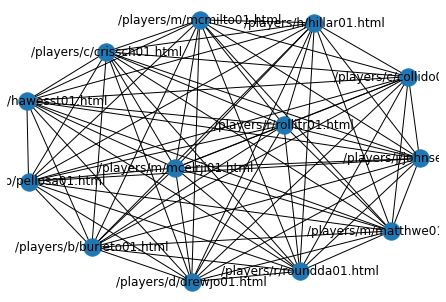

<function matplotlib.pyplot.clf()>

In [563]:
# g = nx.Graph()
# for i in edges:
# #     urlopen.demo[/i[0]]
# #     g.add_node(i[0])
#     g.add_edge(i[0], i[1])
# nx.draw(g, with_labels=True)
# plt.show()
# plt.clf

KeyError: 'image'

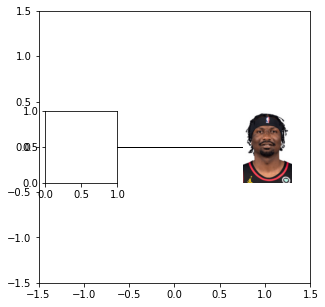

In [556]:
# G=nx.Graph()
# # f = urlopen("https://www.basketball-reference.com/req/202106291/images/players/hillso01.jpg")
# # PIL.Image.open(f)
# url = "https://www.basketball-reference.com/req/202106291/images/players/hillso01.jpg"
# # (PIL.Image.open(urllib.request.urlopen(url))
# G.add_node(0, image=PIL.Image.open(urlopen(url)))
# G.add_edge(0,1)

# pos=nx.circular_layout(G)

# fig=plt.figure(figsize=(5,5))
# ax=plt.subplot(111)
# ax.set_aspect('equal')
# nx.draw_networkx_edges(G,pos,ax=ax)

# plt.xlim(-1.5,1.5)
# plt.ylim(-1.5,1.5)

# trans=ax.transData.transform
# trans2=fig.transFigure.inverted().transform

# piesize=0.2 # this is the image size
# p2=piesize/2.0
# for n in G:
#     xx,yy=trans(pos[n]) # figure coordinates
#     xa,ya=trans2((xx,yy)) # axes coordinates
#     a = plt.axes([xa-p2,ya-p2, piesize, piesize])
#     a.set_aspect('equal')
#     a.imshow(G.nodes[n]['image'])
#     a.axis('off')
# ax.axis('off')
# plt.show()

# nx.draw(G)
# plt.show()
# plt.clf()

In [48]:
playerDf["Player"].value_counts()

Eddie Johnson    29
Mike Dunleavy    26
Kevin Willis     25
Tim Hardaway     25
Vince Carter     25
                 ..
Gar Heard         1
Dave Cowens       1
Toby Knight       1
Doug Collins      1
Tom Burleson      1
Name: Player, Length: 1704, dtype: int64

In [803]:
def genGraph2(df):
    nodes, edges = set(), {}
#     df = df.iloc[:4,37:]
    teams, seasons = df.index, df.columns
    for i, team in enumerate(teams):
        for j, season in enumerate(seasons):
            roster = df.iloc[i, j]   
            try:
                rosterEdges = list(itertools.permutations(roster, 2))
                for k in rosterEdges:
                    nodes.add(k[0])
                    nodes.add(k[1])
                    if k not in edges.keys():
                        edges[k] = [set(), defaultdict(list)]
                        edges[k][0].add(season)
                        edges[k][1][team].append(season)
                    elif team not in edges[k][1].keys():
                        edges[k][0].add(season)
                        edges[k][1][team].append(season)
                    else:
                         if season not in edges[k][1][team]:
                            edges[k][0].add(season)
                            edges[k][1][team].append(season)
                        
#                         if team not in edges[k][1].keys():
#                             edges[k][1][team].append(season)
#                             edges[k][0].add(season)
#                         elif season not in edges[k][1][team]:
#                             edges[k][1][team]
                        
                        
# #                         season in edges[k][1][team]:
# #                             pass
#                         if team not in edges[k][1].keys() and season not in edges[k][1].values():
#                             edges[k][0].add(season)
#                             edges[k][1][team].append(season)
#                         elif team not in edges[k][1].keys() and season in edges[k][1].values():
#                             edges[k][1][team].append(season)
#                         elif team in edges[k][1].keys() and season not in edges[k][1].values():
#                             edges[k][0].add(season)
#                             edges[k][1][team].append(season)
                            
                            
#                         elif season not in edges[k][1][team]:
#                             edges[k][0] += 1
#                             edges[k][1][team].append(season)
            except:    # teams that didn't exist in a given year are omitted eg. Supersonics in 2014
                pass
    return [edges, nodes]

In [879]:
start = time.time()
completeEdges, completeNodes = genGraph2(rostersDf)
print(time.time()-start)

22.085351943969727


In [913]:
# nx.write_gpickle(completeGraph, "test.gpickle")
# toe = nx.read_gpickle("test.gpickle")
# len([path for path in nx.all_shortest_paths(toe, "/players/h/hardati01.html", "/players/g/ginobma01.html")])
# nx.read_gpickle("https://github.com/cashcountinchi/nbaErdos/blob/main/data/completeGraph.gpickle")

FileNotFoundError: [Errno 2] No such file or directory: 'https://github.com/cashcountinchi/nbaErdos/blob/main/data/completeGraph.gpickle'

In [924]:
# imageDf.reset_index(drop=True).to_csv("temp.csv")#, header=["Player Key", "Image"], sep=",", index=False)
# pd.read_csv("temp.csv")

rostersDf.to_csv("rostersDf.csv", index=False)
playerDf.to_csv("playerDf.csv", index=False)
imageDf.to_csv("imageDf.csv", index=False)

In [898]:

# f1, f2 = open("nameDict.pkl", "wb"), open("imageDict.pkl", "wb")
# pickle.dump(nameDict, f1)
# pickle.dump(imageDict, f2)
# f1.close()
# f2.close()

# rostersDf.to_csv("rostersDf.csv")
# playerDf.to_csv("playerDf.csv")
imageDf.to_csv("imageDf.csv")

In [899]:
f1, f2 = open("completeEdges.pkl", "wb"), open("completeNodes.pkl", "wb")
pickle.dump(completeEdges, f1)
pickle.dump(completeNodes, f2)
f1.close()
f2.close()

nx.write_gpickle(completeGraph, "completeGraph.gpickle")

In [890]:
start = time.time()
objects = []
with (open("completeEdges.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
print(time.time()-start)

5.624679803848267


In [82]:
def loadData():
    out = []
    out.append(nx.read_gpickle("data/completeGraph.gpickle"))
    for file in ["completeEdges", "completeNodes", "imageDict", "nameDict"]:
        out.append(pd.read_pickle("data/" + file + ".pkl"))
        # temp = []
        # with (open("nbaErdos/data/"+ i + ".pkl", "rb")) as openfile:
        #     while True:
        #         try:
        #             temp.append(pickle.load(openfile))
        #         except EOFError:
        #             out.append(temp[0])
        #             break

    out.append(dict((v,k) for k,v in sorted(out[4].items(), key=lambda x: x[1])))

    return out

start = time.time()

dataObjects = loadData()
completeGraph = dataObjects[0]
completeEdges, completeNodes = dataObjects[1], dataObjects[2]
imageDict, nameDict, selectboxNames = dataObjects[3], dataObjects[4], dataObjects[5]

print(time.time()-start)

2.4973819255828857


In [24]:
[i for i in nx.all_shortest_paths(out[0], "/players/g/ginobma01.html", "/players/t/thomaku01.html")]

[['/players/g/ginobma01.html', '/players/t/thomaku01.html']]

In [891]:
f1, f2 = open("nameDict.pkl", "wb"), open("imageDict.pkl", "wb")
pickle.dump(nameDict, f1)
pickle.dump(imageDict, f2)
f1.close()
f2.close()

In [900]:
print("here")

here


In [892]:
rostersDf.to_csv("rostersDf.csv")

In [805]:
completeEdges[("/players/g/ginobma01.html", "/players/t/thomaku01.html")]

[{'2007-08', '2008-09'},
 defaultdict(list, {'San Antonio Spurs': ['2007-08', '2008-09']})]

In [69]:
start = time.time()
completeGraph = nx.Graph()
for key, value in completeEdges.items():
    completeGraph.add_node(key[0])
    completeGraph.add_node(key[1])
    completeGraph.add_edge(key[0], key[1])
print(time.time()-start)
#                mutualTeams=value[1].keys(),
#                mutualSeasons=value[1].values(),
#                seasonsTogether=value[0])

# for node in completeNodes:
#     G.add(node)

1.6716821193695068


In [175]:
def edgeTitle(edge, metadata):
    names = ", ".join([nameDict[i] for i in edge])
    seasonsAsTeammates = "Seasons as teammates: {}".format(len(metadata[0]))
    mutualTeams = ""
    for team, years in metadata[1].items():
        mutualTeams += team + ": " + ", ".join(years) + "<br>"
    mutualTeams = mutualTeams[:-4]
    return names + "<br>" + seasonsAsTeammates + "<br>" + mutualTeams
    
    
def nodeTitle(nodes, adjacencyList):
    for node in nodes:
        teammates = [nameDict[i] for i in adjacencyList[node["id"]]]
        node["title"] += "<br> Teammates: <br> &emsp; &emsp;" + teammates[0] + "<br> &emsp; &emsp;"
        node['title'] += "<br> &emsp; &emsp;".join(teammates[1:])
#         title = "Teammates:"
#         teammates = [nameDict[i] for i in adjacencyList[node["id"]]]
#         teammateTitle += "<br>".join(teammates)
        
    
    
    
def addNode(graph, value, source, target):
    if value == source:
        graph.add_node(value, title=nameDict[value], label=" ",
                       shape="circularImage", image=imageDict[value],
                       size=110, borderWidth=12, borderWidthSelected=16, color="green", mass=7)
    elif value == target:
        graph.add_node(value, title=nameDict[value], label=" ",
                       shape="circularImage", image=imageDict[value],
                       size=110, borderWidth=12, borderWidthSelected=16, color="red", mass=7)
    else:
        graph.add_node(value, title=nameDict[value], label=" ",
                       shape="circularImage", borderWidth=3, borderWidthSelected=10, image=imageDict[value],
                       size=60, mass=7, color="white")
        
    
def shortestPathsGraph(source, target):
    G = net.Network(notebook=True, width="150%", height="100%", bgcolor="#222222") 
#     G.barnes_hut(gravity=-2000, central_gravity=0, overlap=0.5, 
#                  damping=0.08, spring_length=350, spring_strength=0)
    G.set_edge_smooth("cubicBezier")   
#     G.show_buttons(filter_=['physics'])
    G.set_options('''
    var options = {
          
          "edges": {
          "arrows": {
          "to": {
            "enabled": true,
            "scaleFactor": 1.75
          }
        },
        "hoverWidth": 6,
        "color": {
          "inherit": true
        },
        "smooth": {
          "type": "cubicBezier",
          "forceDirection": "horizontal"
        }
      },
      "interaction": {
        "tooltipDelay": 0,
        "hover": true
      },
      "physics": {
        "barnesHut": {
          "gravitationalConstant": -2000,
          "centralGravity": 0.15,
          "springLength": 350,
          "springConstant": 0.0005,
          "damping": 0.08,
          "avoidOverlap": 0.5
        },
        "minVelocity": 2,
        "timestep": 0.65
      }
    }
    ''')

    # If a source or target doesn't exist in graph     
    if source not in completeNodes:
        message = "{} was not on an NBA roster from 1980-2021 or did not qualify by playing more than 2500 career minutes"
        return G, message
    elif target not in completeNodes:
        message = "{} was not on an NBA roster from 1980-2021 or did not qualify by playing more than 2500 career minutes"
        return G, message

    paths = [path for path in nx.all_shortest_paths(completeGraph, source, target)]
    if len(paths) == 0:
        return G, "There were no paths found between {} and {}".format(source, target)
    else:
        message = "{} has a {} index of {}".format(nameDict[source],
                                                   " ".join(nameDict[target].split(" ")[1:]),
                                                   len(paths[0])-1)
        message += "\n" + "There are {} shortest paths of length {} between {} and {}".format(len(paths), 
                                                                                              len(paths[0])-1, 
                                                                                              nameDict[source], 
                                                                                              nameDict[target])
        for i in paths:
            for j in list(itertools.permutations(i, 2)):
                if j not in completeEdges.keys():     # edges that are non-existent
                    pass
                else:
                    addNode(G, j[0], source, target)
                    addNode(G, j[1], source, target)
                    G.add_edge(j[0], j[1], title=edgeTitle(j, completeEdges[j]),
                               selectionWidth=14, color="#ffdc17", arrows="to", arrowStrikethrough=False)

#         nodeTitle(G.nodes, G.get_adj_list())

    return G, message

In [180]:
len(graph.nodes)

14

In [177]:
# graph, message = shortestPathsGraph("/players/z/zelleco01.html", "/players/w/walkeke02.html")
# graph, message = shortestPathsGraph("/players/b/brownja02.html", "/players/j/jordami01.html")
# graph, message = shortestPathsGraph("/players/d/duncati01.html", "/players/n/nelsoja01.html")
# graph, message = shortestPathsGraph("/players/g/garneke01.html", "/players/t/turkohe01.html")
# graph, message = shortestPathsGraph("/players/e/ellismo01.html", "/players/e/eatonma01.html")
graph, message = shortestPathsGraph("/players/h/hardati01.html", "/players/g/ginobma01.html")
# graph, message = shortestPathsGraph("/players/g/gortama01.html", "/players/b/barklch01.html")
# graph.width = "50%"
print(message)
graph.show("test.html")

Tim Hardaway has a Ginobili index of 2
There are 12 shortest paths of length 2 between Tim Hardaway and Manu Ginobili


In [168]:
# graph.options["physics"]["barnesHut"]["centralGravity"] = 0
# graph.options["physics"]["barnesHut"]["springConstant"] = 0
# graph.options["physics"]["barnesHut"]["damping"] = 0



# graph.options["physics"]["enabled"]=False


In [62]:
graph.html


'<html>\n<head>\n<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.16.1/vis.css" type="text/css" />\n<script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.16.1/vis-network.min.js"> </script>\n<center>\n<h1></h1>\n</center>\n\n<!-- <link rel="stylesheet" href="../node_modules/vis/dist/vis.min.css" type="text/css" />\n<script type="text/javascript" src="../node_modules/vis/dist/vis.js"> </script>-->\n\n<style type="text/css">\n\n        #mynetwork {\n            width: 1000px;\n            height: 800px;\n            background-color: #222222;\n            border: 1px solid lightgray;\n            position: relative;\n            float: left;\n        }\n\n        \n\n        \n\n        \n</style>\n\n</head>\n\n<body>\n<div id = "mynetwork"></div>\n\n\n<script type="text/javascript">\n\n    // initialize global variables.\n    var edges;\n    var nodes;\n    var network; \n    var container;\n    var options, data;\n\n    \n    // This 

In [867]:
dog = BeautifulSoup(requests.get("https://vsco.co/mybestlifee/media/5fbd8f74912f461255407649").text)
dog


<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="//i.vsco.co" rel="dns-prefetch"/>
<link href="//im.vsco.co" rel="dns-prefetch"/>
<link href="//image.vsco.co" rel="dns-prefetch"/>
<link href="//assets.vsco.co" rel="dns-prefetch"/>
<link href="//assets.vsco.co/assets/images/favicon.ico" rel="shortcut icon"/>
<link href="//assets.vsco.co/assets/images/favicon-152.png" rel="apple-touch-icon-precomposed"/>
<meta content="#FFFFFF" name="msapplication-TileColor"/>
<meta content="//assets.vsco.co/assets/images/favicon-152.png" name="msapplication-TileImage"/>
<title data-rh="true">mybestlifee | VSCO</title>
<meta content="See more of mybestlifee’s content on VSCO." data-rh="true" name="description"><meta content="180225495421654" data-rh="true" property="fb:app_id"><meta content="VSCO®" data-rh="true" property="og:site_name"><meta content=

In [232]:
# selectboxNames = dict((v,k) for k,v in nameDict.items())
# dict(sorted(nameDict.items(), key=lambda item: item[1]))

# selectboxNames = dict((v,k) for k,v in sorted(nameDict.items(), key=lambda x: x[1]))
# selectboxNames

# dog = playerDf.pivot_table(index="Player Key", values=["Team","Season"], aggfunc=set)
# fish = dog.to_dict()
fish["Season"]

{'/players/a/abdelal01.html': {'1990-91',
  '1991-92',
  '1992-93',
  '1993-94',
  '1994-95'},
 '/players/a/abdulka01.html': {'1980-81',
  '1981-82',
  '1982-83',
  '1983-84',
  '1984-85',
  '1985-86',
  '1986-87',
  '1987-88',
  '1988-89'},
 '/players/a/abdulma02.html': {'1990-91',
  '1991-92',
  '1992-93',
  '1993-94',
  '1994-95',
  '1995-96',
  '1996-97',
  '1997-98',
  '2000-01'},
 '/players/a/abdulta01.html': {'1997-98',
  '1998-99',
  '1999-00',
  '2000-01',
  '2001-02',
  '2002-03',
  '2003-04',
  '2004-05',
  '2005-06',
  '2006-07'},
 '/players/a/abdursh01.html': {'1996-97',
  '1997-98',
  '1998-99',
  '1999-00',
  '2000-01',
  '2001-02',
  '2002-03',
  '2003-04',
  '2004-05',
  '2005-06',
  '2006-07',
  '2007-08',
  '2009-10'},
 '/players/a/abernto01.html': {'1980-81'},
 '/players/a/abrinal01.html': {'2016-17', '2017-18', '2018-19'},
 '/players/a/acresma01.html': {'1987-88',
  '1988-89',
  '1989-90',
  '1990-91',
  '1991-92',
  '1992-93'},
 '/players/a/acyqu01.html': {'2012-1

In [231]:
isinstance(cat, str)

True

In [585]:
eww = net.Network("800px", "1000px", notebook=True)
eww.add_node("Dirk", title="WtF")
eww.add_node("Marshawn", label=" df", title=None, shape="box")
eww.add_edge("Dirk", "Marshawn")
# eww.set_options('''
# var options = {
#   "edges": {
#     "arrows": {
#       "to": {
#         "enabled": true,
#         "scaleFactor": 0
#       },
#       "middle": {
#         "enabled": true
#       },
#       "from": {
#         "enabled": true,
#         "scaleFactor": 0
#       }
#     }
#     }}
#     ''')
eww.show("test.html")

In [207]:
["dicl"]+[i for i in range(0)]+["wees"]

['dicl', 'wees']

In [660]:
len(list(itertools.permutations(quack.iloc[0,0], 2)))

156

In [619]:
dfIndex, dfCols = quack.index, quack.columns
edges, nodes = {}, {}

for j in dfCols:
    quack[j].apply(lambda x: genGraphComponents(x))

In [633]:
quack

Season,1980-81,1981-82,1982-83,1983-84,1984-85,1985-86,1986-87,1987-88,1988-89,1989-90,...,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
Team Key,,,,,,,,,,,,,,,,,,,,,
ATL,"[/players/b/burleto01.html, /players/c/collido...","[/players/c/crissch01.html, /players/d/drewjo0...","[/players/b/brownri01.html, /players/d/davisjo...","[/players/b/brownri01.html, /players/c/crissch...","[/players/b/brownri01.html, /players/c/carran0...","[/players/b/battljo01.html, /players/c/carran0...","[/players/b/battljo01.html, /players/c/carran0...","[/players/b/battljo01.html, /players/c/carran0...","[/players/b/battljo01.html, /players/b/bradldu...","[/players/b/battljo01.html, /players/c/carran0...",...,"[/players/c/collija04.html, /players/d/dampier...","[/players/h/harride01.html, /players/h/horfoal...","[/players/a/anticpe01.html, /players/a/ayongu0...","[/players/a/anticpe01.html, /players/b/bazemke...","[/players/b/bazemke01.html, /players/h/hardati...","[/players/b/bazemke01.html, /players/b/bembrde...","[/players/b/babbilu01.html, /players/b/bazemke...","[/players/a/anderju01.html, /players/b/bazemke...","[/players/b/bembrde01.html, /players/c/cartevi...","[/players/h/hillso01.html, /players/h/huertke0..."
BOS,"[/players/a/architi01.html, /players/b/birdla0...","[/players/a/aingeda01.html, /players/a/architi...","[/players/a/aingeda01.html, /players/a/architi...","[/players/a/aingeda01.html, /players/b/birdla0...","[/players/a/aingeda01.html, /players/b/birdla0...","[/players/a/aingeda01.html, /players/b/birdla0...","[/players/a/aingeda01.html, /players/b/birdla0...","[/players/a/acresma01.html, /players/a/aingeda...","[/players/a/acresma01.html, /players/a/aingeda...","[/players/b/baglejo01.html, /players/b/birdla0...",...,"[/players/a/allenra02.html, /players/b/bassbr0...","[/players/b/barbole01.html, /players/b/bassbr0...","[/players/a/anthojo01.html, /players/b/bassbr0...","[/players/b/bassbr01.html, /players/b/bradlav0...","[/players/b/bradlav01.html, /players/c/crowdja...","[/players/b/bradlav01.html, /players/b/brownja...","[/players/b/baynear01.html, /players/b/brownja...","[/players/b/baynear01.html, /players/b/brownja...","[/players/b/brownja02.html, /players/h/haywago...","[/players/t/tatumja01.html, /players/w/willigr..."
CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[/players/b/boguemu01.html, /players/c/chapmre...","[/players/a/anderri01.html, /players/b/boguemu...",...,"[/players/a/augusdj01.html, /players/b/biyombi...","[/players/a/adrieje01.html, /players/b/biyombi...","[/players/a/adrieje01.html, /players/b/biyombi...","[/players/b/biyombi01.html, /players/d/danietr...","[/players/b/batumni01.html, /players/d/danietr...","[/players/b/batumni01.html, /players/b/belinma...","[/players/b/bacondw01.html, /players/b/batumni...","[/players/b/bacondw01.html, /players/b/batumni...","[/players/b/bacondw01.html, /players/b/batumni...","[/players/r/roziete01.html, /players/b/bridgmi..."
CHI,"[/players/d/dietrco01.html, /players/g/gilmoar...","[/players/d/dietrco01.html, /players/g/gilmoar...","[/players/b/bradldu01.html, /players/b/bratzmi...","[/players/c/corzida01.html, /players/d/dailequ...","[/players/c/corzida01.html, /players/d/dailequ...","[/players/b/banksge01.html, /players/b/brewero...","[/players/b/banksge01.html, /players/b/brownmi...","[/players/b/brownmi01.html, /players/c/corzida...","[/players/c/cartwbi01.html, /players/c/corzida...","[/players/a/armstbj01.html, /players/c/cartwbi...",...,"[/players/a/asikom01.html, /players/b/boozeca0...","[/players/a/amundlo01.html, /players/b/belinma...","[/players/a/amundlo01.html, /players/a/augusdj...","[/players/b/brookaa01.html, /players/b/butleji...","[/players/b/brookaa01.html, /players/b/butleji...","[/players/b/butleji01.html, /players/c/canaais...","[/players/a/arcidry01.html, /players/a/asikom0...","[/players/a/arcidry01.html, /players/c/cartewe...","[/players/a/arcidry01.html, /players/c/cartewe...","[/players/w/willipa01.html, /players/w/whi

In [441]:
# dog = quack.iloc[1:3,39:41]
# dog
# dog.apply(genGraphComponents, axis=0)
genGraphComponents(quack.iloc[1,39])
genGraphComponents(quack.iloc[2,39])
genGraphComponents(quack.iloc[1,40])
genGraphComponents(quack.iloc[2,40])

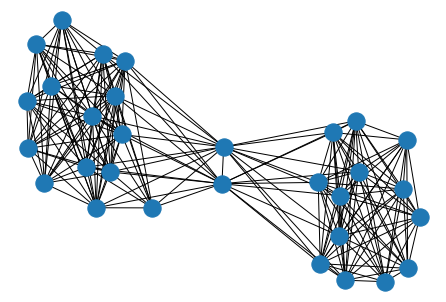

<function matplotlib.pyplot.clf()>

In [446]:
F = nx.Graph()
F.add_edges_from(edges)
nx.draw(F)
plt.show()
plt.clf

In [204]:
# sh = [nameDict[i] path  for i in path]
# pd.DataFrame(sh)

# mew = []
# for path in nx.all_shortest_paths(completeGraph, "/players/h/hardati01.html", "/players/g/ginobma01.html"):
#     row = []
#     for i in path:
#         row.append(nameDict[i])
#     mew.append(row)

dick = pd.DataFrame(mew)
dick.index


RangeIndex(start=0, stop=12, step=1)

In [210]:
# dirk = list(nx.all_shortest_paths(completeGraph,"/players/z/zelleco01.html", "/players/w/walkeke02.html"))
dick = pd.DataFrame(dirk)
dick.index.name="fuck"
dick
# lambda x:
# not nx.has_path(completeGraph, "/players/h/hardati01.html", "/players/g/ginobma01.html")

,0,1
fuck,,
0,/players/z/zelleco01.html,/players/w/walkeke02.html


In [211]:
lst = [1,2,3,4]
lst[1:-1]


[2, 3]

In [87]:
"/players/z/zelleco01.html" in completeNodes

True

In [250]:
shell.find_all("img", attrs={"itemscope": "image"}, src=True)[0]["src"]

'https://www.basketball-reference.com/req/202106291/images/players/hillso01.jpg'

In [251]:
shell = BeautifulSoup(requests.get("https://www.basketball-reference.com/players/r/roberan01.html").text)
shell
# shell.find_all("td", attrs={"data-stat": "g"})
# shell.find_all("tfoot")[0].find_all("td", attrs={"data-stat": "mp_per_g"})[0]
#.find_all("td", attrs={"data-stat": "g"})[]


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202106153" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://quantcast.mgr.consensu.org'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js')
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	functio

In [178]:
demo = requests.get("https://www.basketball-reference.com/teams/ATL/2021.html")
demoPage = BeautifulSoup(demo.text)

coal = demoPage.find_all("table")
# coal

[i.find_all("caption") for i in coal]
# demoPage.find_all("span", attrs={"itemprop":"name"})
# fish = demoPage.find_all("title")[0].text.split(" ")
# fish[:-5]

[[<caption>Roster Table</caption>],
 [<caption>Per Game Table</caption>],
 [<caption>Per Game Table</caption>],
 [<caption>Totals Table</caption>],
 [<caption>Totals Table</caption>],
 [<caption>Advanced Table</caption>],
 [<caption>Advanced Table</caption>]]

In [179]:
coal[1]

<table class="stats_table sortable" data-cols-to-freeze=",2" id="per_game"> <caption>Per Game Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th> <th aria-label=" " class="poptip sort_default_asc center" data-stat="player" scope="col"> </th> <th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th> <th aria-label="Games" class="poptip center" data-stat="g" data-tip="Games" scope="col">G</th> <th aria-label="Games Started" class="poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th> <th aria-label="Minutes Played Per Game" class="

In [174]:
coal[2]

<table class="stats_table sortable" data-cols-to-freeze=",2" id="playoffs_per_game"> <caption>Per Game Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th> <th aria-label=" " class="poptip sort_default_asc center" data-stat="player" scope="col"> </th> <th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th> <th aria-label="Games" class="poptip center" data-stat="g" data-tip="Games" scope="col">G</th> <th aria-label="Games Started" class="poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th> <th aria-label="Minutes Played Per Game

In [8]:
meow = demoPage.find_all("tbody")[0]
meow.find_all("tr")

[<tr><th class="left" data-stat="season" scope="row"><a href="/teams/CHI/2021.html">2020-21</a></th><td class="left" data-stat="lg_id"><a href="/leagues/NBA_2021.html">NBA</a></td><td class="left" data-stat="team_name"><a href="/teams/CHI/2021.html">Chicago Bulls</a></td><td class="right" data-stat="wins">31</td><td class="right" data-stat="losses">41</td><td class="right" data-stat="win_loss_pct">.431</td><td class="right" data-stat="rank_team">3rd of 5</td><td class="right" data-stat="srs">-0.94</td><td class="right iz" data-stat="DUMMY"></td><td class="right" data-stat="pace">99.0</td><td class="center" data-stat="pace_rel">-0.2</td><td class="right" data-stat="off_rtg">111.1</td><td class="center worse" data-stat="off_rtg_rel">-1.2</td><td class="right" csk="112.0" data-stat="def_rtg">112.0</td><td class="center better" data-stat="def_rtg_rel">-0.3</td><td class="right iz" data-stat="DUMMY"></td><td class="left iz" csk="0:0:2021" data-stat="rank_team_playoffs"></td><td class="left"

In [21]:
meow.find_all("tr")[0].find_all("a", href=True)[0]["href"]

'/teams/CHI/2021.html'

In [14]:
requests.get("https://www.basketball-reference.com/teams/CHI/")

<Response [200]>

In [15]:
time.sleep(5)
print("hello welcome")

hello welcome


In [31]:
mick = BeautifulSoup(requests.get("https://www.basketball-reference.com/teams/ATL/2021.html").text).find_all("tbody")
mick

[<tbody><tr><th class="center" data-stat="number" scope="row">18</th><td class="left" csk="Hill,Solomon" data-stat="player"><a href="/players/h/hillso01.html">Solomon Hill</a></td><td class="center" csk="4" data-stat="pos">PF</td><td class="right" csk="78.0" data-stat="height">6-6</td><td class="right" data-stat="weight">226</td><td class="left" csk="19910318" data-stat="birth_date">March 18, 1991</td><td class="right" data-stat="birth_country"><span class="f-i f-us" style="">us</span></td><td class="right" csk="7" data-stat="years_experience">7</td><td class="left" data-stat="college"><a href="/friv/colleges.fcgi?college=arizona">Arizona</a></td></tr>
 <tr><th class="center" data-stat="number" scope="row">3</th><td class="left" csk="Huerter,Kevin" data-stat="player"><a href="/players/h/huertke01.html">Kevin Huerter</a></td><td class="center" csk="2" data-stat="pos">SG</td><td class="right" csk="79.0" data-stat="height">6-7</td><td class="right" data-stat="weight">190</td><td class="le

In [59]:
# mick[4].find_all("td", attrs={"data-stat": "player"})
[k.text for k in mick[4].find_all("a")[::2]]
#("th", attrs={""})

['Trae Young',
 'Bogdan Bogdanović',
 'John Collins',
 'Clint Capela',
 'Kevin Huerter',
 'Danilo Gallinari',
 'Lou Williams',
 'Onyeka Okongwu',
 "De'Andre Hunter",
 'Solomon Hill',
 'Cam Reddish',
 'Tony Snell',
 'Kris Dunn',
 'Skylar Mays',
 'Nathan Knight',
 'Bruno Fernando']

In [49]:
demo = [1,2,3,4,5,6] 
demo[::2]

[1, 3, 5]

In [57]:
set([1,2,3] + [3,4,5])

{1, 2, 3, 4, 5}

In [97]:
mcih = defaultdict(str)
bitch = [i.find("a").text for i in mick[0].find_all("td", attrs={"data-stat": "player"})] +[i.find("a").text for i in mick[4].find_all("td", attrs={"data-stat": "player"})] 
# [mcih.add(i) for i in bitch]
dict.fromkeys(bitch)

{'Solomon Hill': None,
 'Kevin Huerter': None,
 'Trae Young': None,
 'John Collins': None,
 'Clint Capela': None,
 'Danilo Gallinari': None,
 'Onyeka Okongwu': None,
 'Tony Snell': None,
 'Brandon Goodwin': None,
 'Bogdan Bogdanović': None,
 'Nathan Knight': None,
 'Skylar Mays': None,
 'Bruno Fernando': None,
 'Cam Reddish': None,
 'Lou Williams': None,
 "De'Andre Hunter": None,
 'Kris Dunn': None}

In [94]:
[i.find("a")["href"] for i in mick[0].find_all("td", attrs={"data-stat": "player"})]

['/players/h/hillso01.html',
 '/players/h/huertke01.html',
 '/players/y/youngtr01.html',
 '/players/c/collijo01.html',
 '/players/c/capelca01.html',
 '/players/g/gallida01.html',
 '/players/o/okongon01.html',
 '/players/s/snellto01.html',
 '/players/g/goodwbr01.html',
 '/players/b/bogdabo01.html',
 '/players/k/knighna01.html',
 '/players/m/mayssk01.html',
 '/players/f/fernabr01.html',
 '/players/r/reddica01.html',
 '/players/w/willilo02.html',
 '/players/h/huntede01.html',
 '/players/d/dunnkr01.html']

In [78]:
BeautifulSoup(requests.get("https://www.basketball-reference.com/players/g/greenda02.html").text)


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202106153" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://quantcast.mgr.consensu.org'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js')
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	functio